In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = fetch_california_housing()

In [3]:
housing_data = pd.DataFrame(df.data, columns=df.feature_names)
y=df.target

In [4]:
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [6]:
target_data=pd.DataFrame(y)

In [7]:
housing_data["Latitude"].shape

(20640,)

In [8]:
target_data.shape

(20640, 1)

In [9]:
target_data.head()

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [10]:
housing_data["Latitude"].corr(target_data[0])

-0.1441602768746595

In [11]:
housing_data["Longitude"].corr(target_data[0])

-0.04596661511797862

In [12]:
for column in housing_data:
    print(column, housing_data[column].corr(target_data[0]))

MedInc 0.6880752079585477
HouseAge 0.10562341249320979
AveRooms 0.15194828974145771
AveBedrms -0.046700512969486886
Population -0.024649678888894862
AveOccup -0.023737412956134345
Latitude -0.1441602768746595
Longitude -0.04596661511797862


In [13]:
housing_data["TotalArea"] = housing_data["AveRooms"] + (-1) * housing_data["AveBedrms"]

In [14]:
housing_data["TotalArea"].corr(target_data[0])

0.1906801483752958

In [15]:
housing_data.drop(columns=["AveRooms", "AveBedrms"], inplace=True)

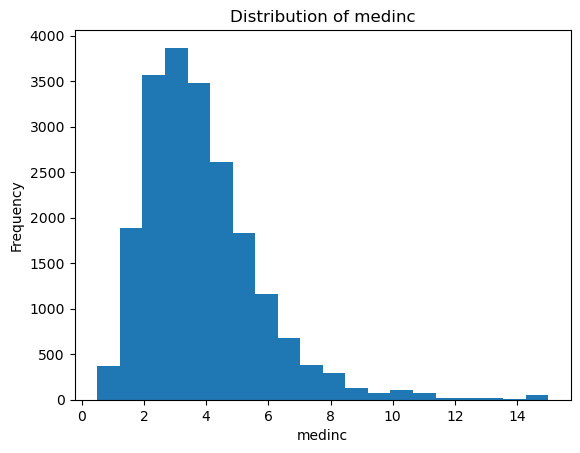

In [16]:
import matplotlib.pyplot as plt

# Assuming housing_data is your DataFrame
plt.hist(housing_data['MedInc'], bins=20)
plt.xlabel('medinc')
plt.ylabel('Frequency')
plt.title('Distribution of medinc')
plt.show()

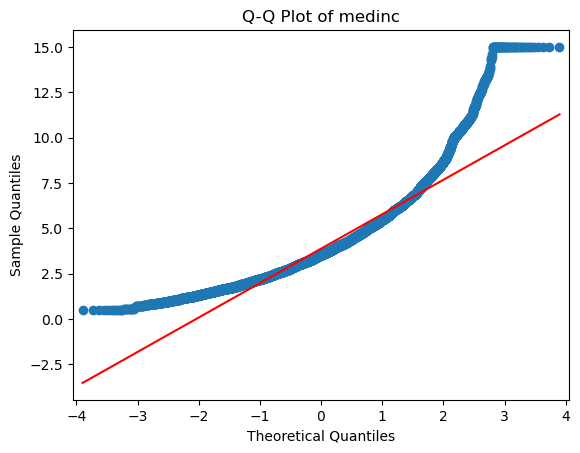

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming housing_data is your DataFrame
sm.qqplot(housing_data['MedInc'], line='s')
plt.title('Q-Q Plot of medinc')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(housing_data, y, 
                                                  random_state=42, 
                                                  test_size=0.2, 
                                                  shuffle=True)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR

In [20]:
from sklearn.svm import SVR

reg_svr=SVR(kernel="rbf",
           gamma=3,
           C=10)

In [21]:
reg_svr.fit(X_train_scaled, y_train)

SVR(C=10, gamma=3)

In [22]:
y_pred=reg_svr.predict(X_test_scaled)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

svr_mse=mean_squared_error(y_test, y_pred)
svr_rmse=np.sqrt(svr_mse)

In [24]:
print(svr_mse, svr_rmse)

0.4036659214026461 0.6353470873488334


In [25]:
svr_r2=r2_score(y_test, y_pred)

In [26]:
print(svr_r2)

0.6919542462655213


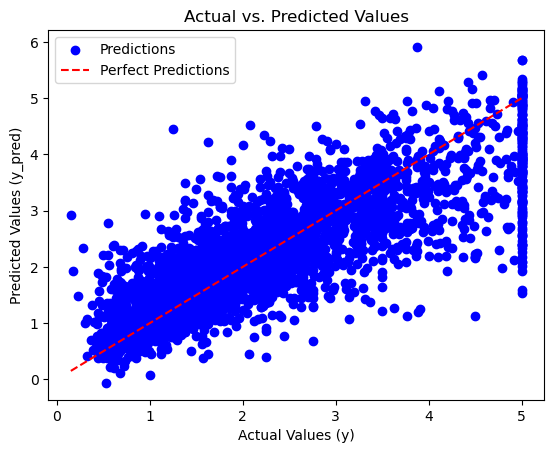

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predictions')

plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')

plt.legend()
plt.show()

# SGD Regressor

In [28]:
from sklearn.linear_model import SGDRegressor
sg_reg=SGDRegressor(max_iter=1000, 
                   random_state=42, 
                    alpha=0.0001
                   )

sg_reg.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [29]:
y_pred=sg_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

svr_mse=mean_squared_error(y_test, y_pred)
svr_rmse=np.sqrt(svr_mse)
print(svr_mse, svr_rmse)

svr_r2=r2_score(y_test, y_pred)
print(svr_r2)

0.5451680116378045 0.7383549360827789
0.5839710955203916


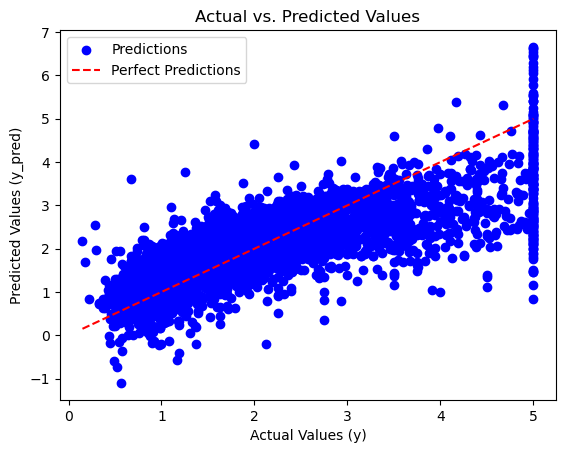

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predictions')

plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')

plt.legend()
plt.show()

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators=150, max_depth=10, max_features=1)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, max_features=1, n_estimators=150)

In [41]:
y_pred=rf_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

svr_mse=mean_squared_error(y_test, y_pred)
svr_rmse=np.sqrt(svr_mse)
print(svr_mse, svr_rmse)

svr_r2=r2_score(y_test, y_pred)
print(svr_r2)

0.3641787015495252 0.6034722044547911
0.7220877545891049


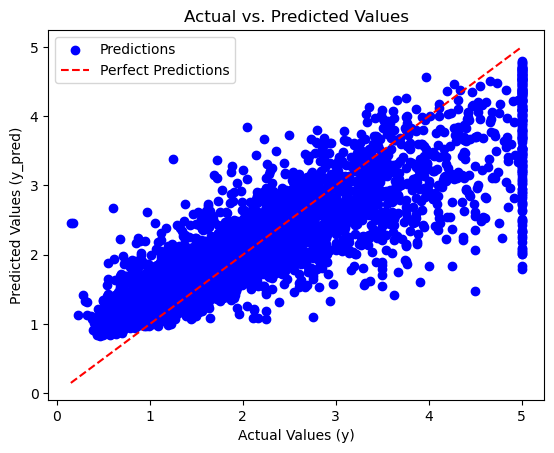

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predictions')

plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')

plt.legend()
plt.show()

# XGBoost

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
import xgboost

xgb_reg=xgboost.XGBRegressor(n_estimators=150)
xgb_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
y_pred=xgb_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

xg_mse=mean_squared_error(y_test, y_pred)
xg_rmse=np.sqrt(xg_mse)
print(xg_mse, xg_rmse)

xg_r2=r2_score(y_test, y_pred)
print(xg_r2)

0.21395341606663187 0.4625509875317875
0.8367277547549742


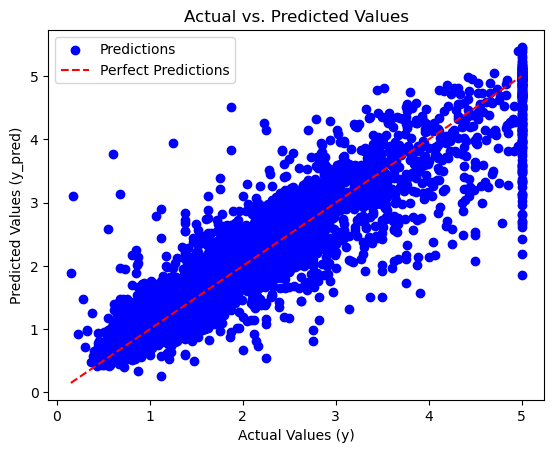

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predictions')

plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Predictions')

plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')

plt.legend()
plt.show()